In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## question 1

In [2]:
#import dataset
delivary_data=pd.read_csv('delivery_time.csv')
delivary_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
delivary_data.shape

(21, 2)

In [4]:
delivary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
# checking null values
delivary_data.isnull()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
delivary_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
delivary_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
#checking dupkicated values
delivary_data.duplicated().sum()

0

In [9]:
# column renaming
delivary_data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1,inplace=True)
delivary_data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### EDA

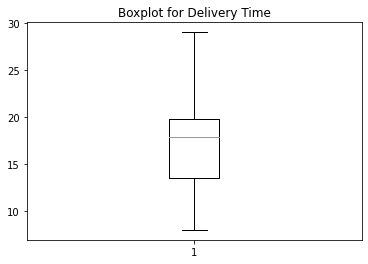

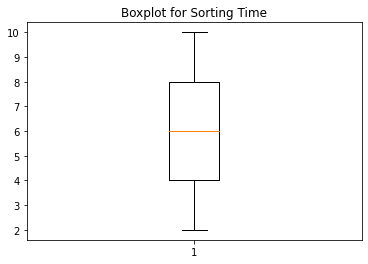

In [16]:
plt.boxplot(delivary_data['Delivery_Time'])
plt.title('Boxplot for Delivery Time')
plt.show()

plt.boxplot(delivary_data['Sorting_Time'])
plt.title('Boxplot for Sorting Time')
plt.show()

From the boxplots it is clear that there is no outlier in the data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


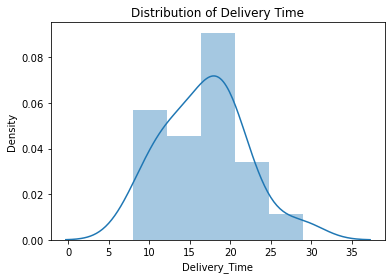

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


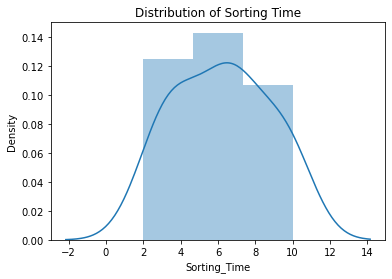

In [27]:
sns.distplot(delivary_data['Delivery_Time'])
plt.title('Distribution of Delivery Time')
plt.show()

sns.distplot(delivary_data['Sorting_Time'])
plt.title('Distribution of Sorting Time')
plt.show()

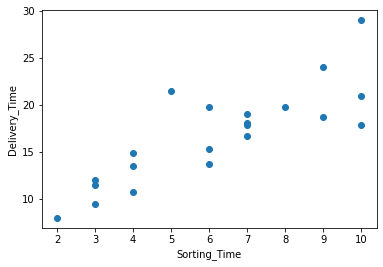

In [13]:
plt.scatter(x='Sorting_Time',y='Delivery_Time',data=delivary_data)
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')
plt.show()

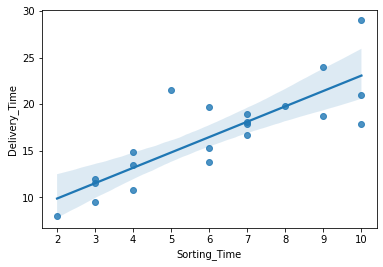

In [14]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=delivary_data)
plt.show()

In [28]:
#finding codilation coefficienht
delivary_data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


there is a strong corrlelation between deliaery time and delivary data.

## MODEL BUILDING

In [29]:
model=sm.ols('Delivery_Time~Sorting_Time',data=delivary_data).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        10:29:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

### DELIVARY_TIME = 6.582734 + 1.649020 * Sorting_Time

### TRANSFORMATIONS

### 1. Standardizing

In [32]:
## STANDARDIZING THE VARIABLES
scale=StandardScaler()
std=scale.fit_transform(delivary_data)
std

array([[ 0.84986692,  1.53562462],
       [-0.66449036, -0.88298415],
       [ 0.59747404, -0.07678123],
       [ 1.45560983,  1.13252315],
       [ 2.46518134,  1.53562462],
       [-0.2909489 , -0.07678123],
       [ 0.44603831,  0.32632023],
       [-1.47214757, -1.28608562],
       [ 0.22393258,  1.53562462],
       [ 0.39555973,  1.13252315],
       [ 0.61362718,  0.72942169],
       [-1.21975469, -0.88298415],
       [-0.02240287,  0.32632023],
       [-1.06831896, -1.28608562],
       [-0.96130438, -1.28608562],
       [-0.38584862, -0.88298415],
       [-0.61401178, -0.07678123],
       [ 0.26633458,  0.32632023],
       [-1.77501902, -1.68918708],
       [ 0.20979858,  0.32632023],
       [ 0.95082407, -0.47988269]])

In [56]:
delivary_data_std=pd.DataFrame(std,columns=delivary_data.columns)
delivary_data_std

,Delivery_Time,Sorting_Time
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [34]:
delivary_data_std.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [35]:
model_2=sm.ols('Delivery_Time~Sorting_Time',data=delivary_data).fit()

In [36]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        10:31:22   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Normalizing

In [38]:
scale = MinMaxScaler()
norm = scale.fit_transform(delivary_data)
norm

array([[0.61904762, 1.        ],
       [0.26190476, 0.25      ],
       [0.55952381, 0.5       ],
       [0.76190476, 0.875     ],
       [1.        , 1.        ],
       [0.35      , 0.5       ],
       [0.52380952, 0.625     ],
       [0.07142857, 0.125     ],
       [0.47142857, 1.        ],
       [0.51190476, 0.875     ],
       [0.56333333, 0.75      ],
       [0.13095238, 0.25      ],
       [0.41333333, 0.625     ],
       [0.16666667, 0.125     ],
       [0.19190476, 0.125     ],
       [0.32761905, 0.25      ],
       [0.27380952, 0.5       ],
       [0.48142857, 0.625     ],
       [0.        , 0.        ],
       [0.46809524, 0.625     ],
       [0.64285714, 0.375     ]])

In [39]:
delivary_data_norm = pd.DataFrame(norm,columns=delivary_data.columns)
delivary_data_norm

,Delivery_Time,Sorting_Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000
5,0.350000,0.500
6,0.523810,0.625
7,0.071429,0.125
8,0.471429,1.000
9,0.511905,0.875


In [40]:
delivary_data_norm.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [41]:
model_3=sm.ols('Delivery_Time~Sorting_Time',data=delivary_data_norm).fit()

In [42]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        10:34:59   Log-Likelihood:                 12.578
No. Observations:                  21   AIC:                            -21.16
Df Residuals:                      19   BIC:                            -19.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0896      0.060      1.496      0.151      -0.036       0.215
Sorting_Time     0.6282      0.098      6.387      0.000       0.422       0.834
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model_3.params

Intercept       0.089561
Sorting_Time    0.628198
dtype: float64

### 3. Squareroot

In [46]:
delivary_data_sqrt = np.sqrt(delivary_data)
delivary_data_sqrt

,Delivery_Time,Sorting_Time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278
5,3.917908,2.449490
6,4.358899,2.645751
7,3.082207,1.732051
8,4.230839,3.162278
9,4.330127,3.000000


In [47]:
delivary_data_sqrt.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.853933
Sorting_Time,0.853933,1.000000


In [49]:
model_4 = sm.ols('Delivery_Time~Sorting_Time',delivary_data_sqrt).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           8.48e-07
Time:                        10:38:43   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6135      0.349      4.628      0.000       0.884       2.343
Sorting_Time     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4. Log

In [50]:
delivary_data_log = np.log(delivary_data)
delivary_data_log

,Delivery_Time,Sorting_Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


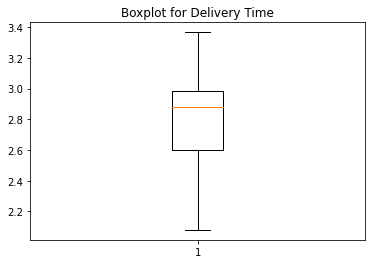

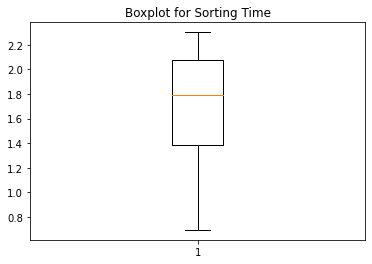

In [62]:
plt.boxplot(delivary_data_log['Delivery_Time'])
plt.title('Boxplot for Delivery Time')
plt.show()

plt.boxplot(delivary_data_log['Sorting_Time'])
plt.title('Boxplot for Sorting Time')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


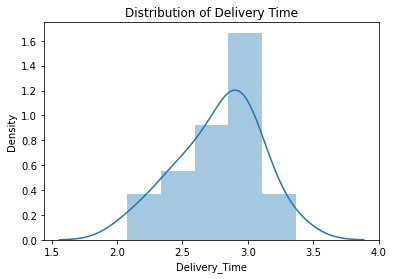

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


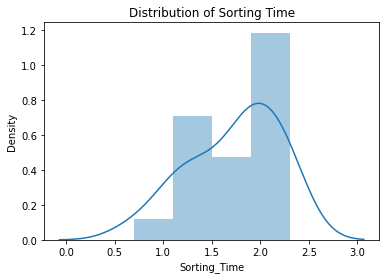

In [60]:
sns.distplot(delivary_data_log['Delivery_Time'])
plt.title('Distribution of Delivery Time')
plt.show()

sns.distplot(delivary_data_log['Sorting_Time'])
plt.title('Distribution of Sorting Time')
plt.show()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

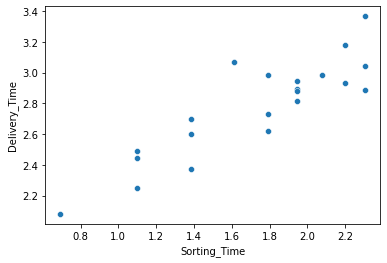

In [59]:
sns.scatterplot(x='Sorting_Time',y='Delivery_Time',data=delivary_data_log)

In [51]:
delivary_data_log.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.878727
Sorting_Time,0.878727,1.000000


In [52]:
model_5 = sm.ols('Delivery_Time~Sorting_Time',delivary_data_log).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.60e-07
Time:                        10:42:29   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7420      0.133     13.086      0.000       1.463       2.021
Sorting_Time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above models it is clear that model_5 gives the best result.

In [54]:
model_5.params

Intercept       1.741987
Sorting_Time    0.597522
dtype: float64

So the best regression model build is,
### Delivery_Time = 1.741987 + 0.597522 * Sorting_Time

## question 2


In [63]:
salary_data=pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [64]:
salary_data.shape

(30, 2)

In [65]:
salary_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [66]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [67]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [68]:
salary_data.duplicated().sum()

0

### EDA

{'whiskers': [<matplotlib.lines.Line2D at 0x1d3369c32e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3369c3a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3369b7ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3369cd160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3369cd4f0>],
 'means': []}

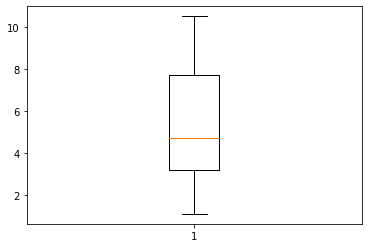

In [69]:
plt.boxplot(salary_data['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d336a1f400>,
 'caps': [<matplotlib.lines.Line2D at 0x1d336a1fa00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d336a1f0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d336a2c160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d336a2c4f0>],
 'means': []}

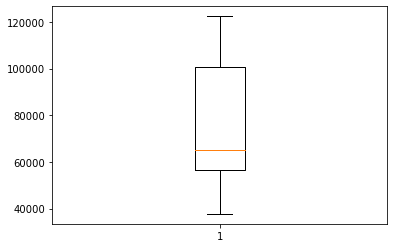

In [70]:
plt.boxplot(salary_data['Salary'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


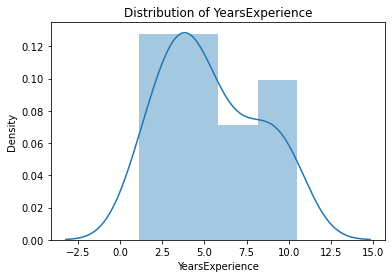

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


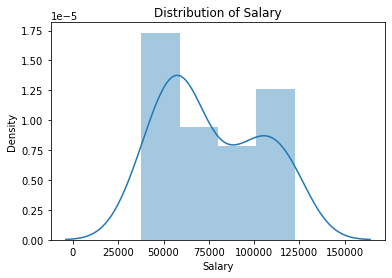

In [72]:
sns.distplot(salary_data['YearsExperience'])
plt.title('Distribution of YearsExperience')
plt.show()

sns.distplot(salary_data['Salary'])
plt.title('Distribution of Salary')
plt.show()

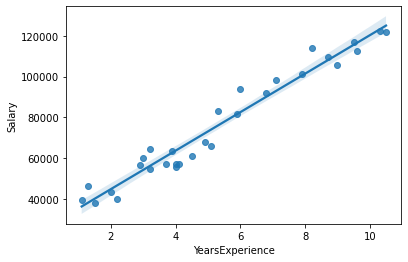

In [71]:
sns.regplot(x='YearsExperience',y='Salary',data=salary_data)
plt.show()

In [73]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## model building

In [74]:
linearmodel=sm.ols('Salary~YearsExperience',data=salary_data).fit()

In [75]:
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        10:56:12   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
linearmodel.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

### salary= 25792.200199+YearsExperience*9449.962321

### TRANSFORMATIONS

### 1. Standardizing

In [77]:
scale = StandardScaler()
std = scale.fit_transform(salary_data)
std

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143],
       [-0.86493538, -0.71830716],
       [-0.82909552, -0.58815781],
       [-0.75741579, -0.79981746],
       [-0.75741579, -0.42881019],
       [-0.57821647, -0.69801306],
       [-0.50653674, -0.47433279],
       [-0.47069688, -0.74976858],
       [-0.47069688, -0.70662043],
       [-0.43485702, -0.70201994],
       [-0.29149756, -0.55250402],
       [-0.1481381 , -0.29921736],
       [-0.07645838, -0.37004264],
       [-0.00477865,  0.26285865],
       [ 0.21026054,  0.19885989],
       [ 0.2461004 ,  0.66547573],
       [ 0.53281931,  0.58377993],
       [ 0.6403389 ,  0.82623317],
       [ 0.92705781,  0.93861127],
       [ 1.03457741,  1.40274136],
       [ 1.21377673,  1.24020308],
       [ 1.32129632,  1.09740238],
       [ 1.50049564,  1.51986835],
       [ 1.5363355 ,  1.3590738 ],
       [ 1.78721455,

In [81]:
salary_data_std = pd.DataFrame(std,columns=salary_data.columns)
salary_data_std

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


In [82]:
salary_data_std.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [84]:
model_2 = sm.ols('Salary~YearsExperience',data=salary_data_std).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        10:58:54   Log-Likelihood:                 4.6151
No. Observations:                  30   AIC:                            -5.230
Df Residuals:                      28   BIC:                            -2.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept                0      0.039          0      1.000      -0.080       0.080
YearsExperience     0.9782      0.039     24.950      0.000       0.898       1.059
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Log

In [85]:
salary_data_log = np.log(salary_data)
salary_data_log

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


In [86]:
salary_data_log.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.951428
Salary,0.951428,1.000000


In [87]:
model_3 = sm.ols('Salary~YearsExperience',data=salary_data_log).fit()

In [88]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           7.40e-16
Time:                        11:01:03   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3280      0.056    184.868      0.000      10.214      10.442
YearsExperience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So the best model is linearmodel
### Salary = 25792.200199 + YearsExperience * 9449.962321